# Rappels sur les systèmes d'ordre 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lti

#### Table des matières

* [Définition](#Définition)
    * [Equation différentielle](#Equation-différentielle)
    * [Fonction de transfert](#Fonction-de-transfert)
* [Réponse Indicielle](#Réponse-Indicielle)
    * [Propriétés](#Propriétés)
* [Réponse Fréquentielle](#Réponse-Fréquentielle)
    * [Module](#Module)
    * [Argument](#Argument)
   
    
## Définition 

### Equation différentielle

Soit $e(t)$ l'entrée d'un système LTI et $s(t)$ sa sortie. Pour un système passe-bas linéaire d'ordre 1, le lien entre l'entrée et la sortie peut être régit par une équation différentielle de premier ordre à coefficients constants.

$$\tau \frac{d s(t)}{dt}+s(t)=Ke(t)$$

* $K\ge 0$ : gain statique
* $\tau \ge 0$ : constante de temps (en s)

### Fonction de transfert

La fonction de transfert d'un système passe-bas de premier ordre est donnée par :

$$H(p)=\frac{K}{1+\tau p}$$

* $p_1=-\frac{1}{\tau}$ : pôle réel négatif.

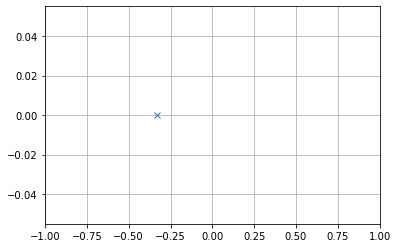

In [2]:
K, tau = 2,3
H = lti([K],[tau,1])

poles = H.poles
plt.plot(np.real(poles),np.imag(poles),'x')
plt.grid()
plt.xlim([-1,1]);

## Réponse Indicielle

La réponse indicielle correspond à la réponse du système lorsque l'entrée est un échelon c-a-d 

$$e(t)=Eu(t)=\left\{\begin{array}{cl} E &\text{ si }t\ge 0\\
0&\text{ sinon}\\
\end{array}\right. $$

La réponse indicielle d'un système passe-bas de premier ordre est donnée par :

$$s(t)=KE\left(1-e^{-\frac{1}{\tau}t}\right)u(t)$$

### Propriétés 

* Valeur initiale : $s(0)=0$,
* Valeur finale : $s(\infty)=KE$,
* Temps de réponse à $\pm 5\%$ : $s(t_r)=0.95s(\infty)$ avec $t_r\approx 3\tau$ s,
* Pas de dépassement : $s(\infty)=\max(s(t))=KE$
    

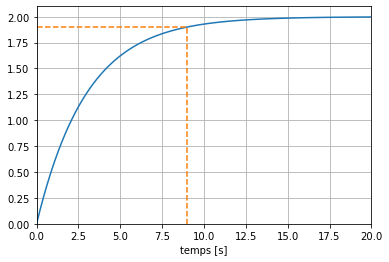

In [7]:
E = 1
t,s = H.step()  #E=1

plt.plot(t,s)
plt.plot([0,3*tau,3*tau],[0.95*K*E,0.95*K*E,0],'--')
plt.grid()
plt.xlim([0,20])
plt.ylim([0,2.1])
plt.xlabel("temps [s]");

## Réponse Fréquentielle

La réponse fréquentielle s'obtient en posant $p=j\omega$ où $\omega$ désigne la pulsation (en rad/s). La réponse fréquentielle d'un système passe-bas de premier ordre est donnée par :

$$H(j\omega)=\frac{K}{1+j\omega \tau}$$

In [4]:
w,Hjw = H.freqresp(w=np.logspace(-2,1))

### Module

Pour $K>0$, le module s'exprime sous la forme

$$|H(j\omega)|=\frac{K}{\sqrt{1+(\omega\tau)^2}}$$

* Amplification basse-fréquence : $\lim_{\omega\to 0}|H(j\omega)|=K$,
* Amplification haute-fréquence : $\lim_{\omega\to \infty}|H(j\omega)|=0$.
* Pulsation de coupure à -3dB : $|H(j\omega_c)|=K/\sqrt{2}$ pour $\omega_c=\frac{1}{\tau}$ rad/s.
* Comportement asymptotique : Pour $\omega \gg \omega_c$, $|H(j\omega)|\approx K \left(\frac{\omega_c}{\omega}\right)$

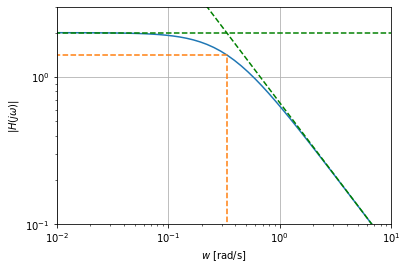

In [5]:
wc = 1/tau
Hjwc = K/np.sqrt(2)

plt.loglog(w,np.abs(Hjw))
plt.plot([0,wc,wc],[Hjwc,Hjwc,0],'--')
plt.plot([0,10],[K,K],'g--')
plt.plot([0.01,10],[K*(wc/0.01),K*wc/10],'g--')
plt.ylim([0.1,3])
plt.xlim([0.01,10])
plt.grid()
plt.xlabel("$w$ [rad/s]")
plt.ylabel("$|H(j\omega)|$");

### Argument

Pour $K>0$, l'argument s'exprime sous la forme

$$\arg[H(j\omega)]=-\arctan(\omega\tau)$$

* Déphasage basse-fréquence : $\lim_{\omega\to 0}\arg[H(j\omega)]=0$,
* Déphasage haute-fréquence : $\lim_{\omega\to \infty}\arg[H(j\omega)]=-90^o$.
* Déphasage à la pulsation de coupure à -3dB : $\arg[H(j\omega_c)]=-45^o$ rad/s.

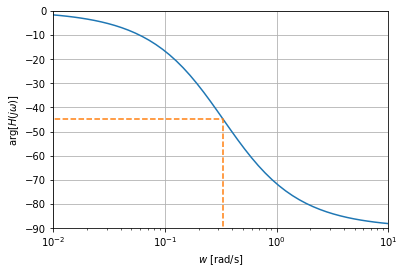

In [6]:
plt.semilogx(w,180*np.angle(Hjw)/np.pi)
plt.plot([0,wc,wc],[-45,-45,-90],'--')
plt.ylim([-90,0])
plt.xlim([0.01,10])
plt.grid()
plt.xlabel("$w$ [rad/s]")
plt.ylabel("$\\arg[H(j\omega)]$");